In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [3]:
ts = np.arange(0,10,0.01)
ys = np.sin(3*ts) + np.random.normal(loc=0,size=len(ts),scale=0.5)

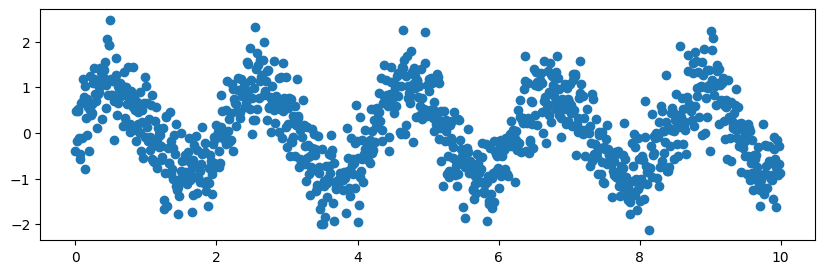

In [4]:
plt.scatter(ts,ys)

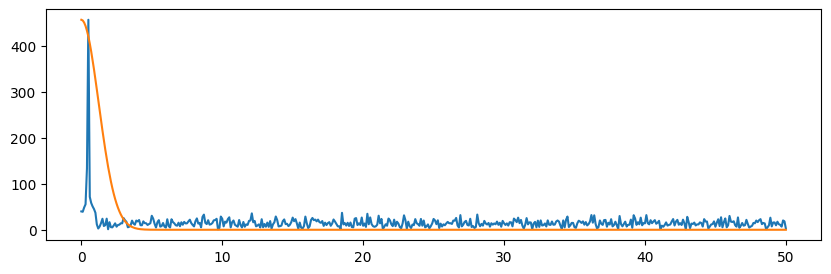

In [5]:
freq = np.fft.rfftfreq(len(ts),ts[1]-ts[0])
FFT = np.fft.rfft(ys)

plt.plot(freq,abs(FFT))
plt.plot(freq,abs(FFT).max()*np.exp(-freq**2/3))

In [6]:
FFT_filtrada = FFT * np.exp(-freq**2/3)

(0.0, 15.0)

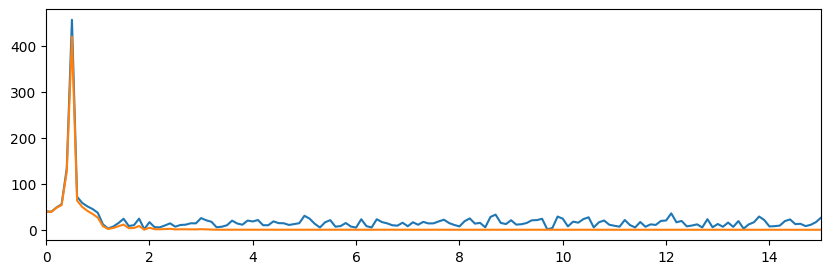

In [7]:
plt.plot(freq,abs(FFT))
plt.plot(freq,abs(FFT_filtrada))
plt.xlim(0,15)

In [8]:
y_filt = np.fft.irfft(FFT_filtrada)

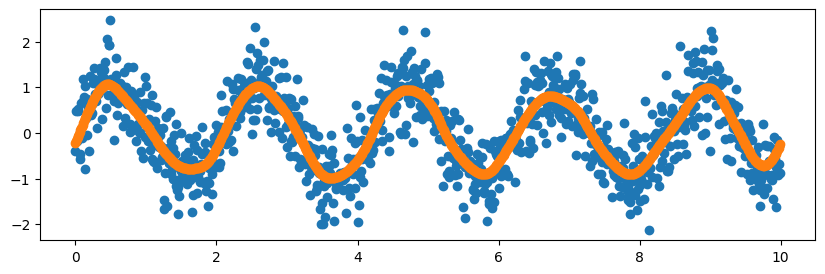

In [9]:
plt.scatter(ts,ys)
plt.scatter(ts,y_filt)

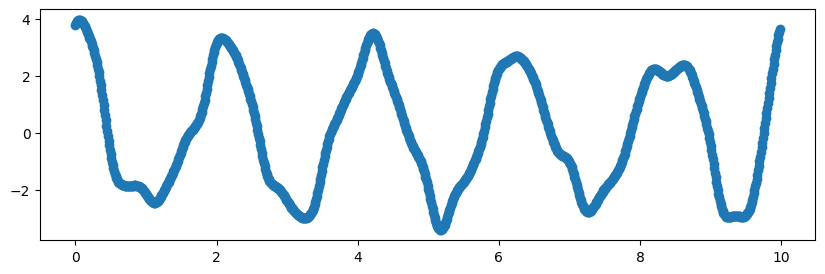

In [10]:
plt.scatter(ts[:-1],np.diff(y_filt)/ts[1])

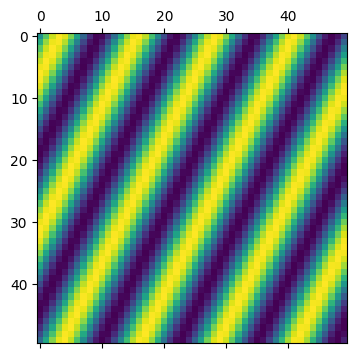

In [12]:

N = 50
x,y = np.meshgrid(range(N),range(N))

plt.matshow( np.sin(x/2+y/4) )

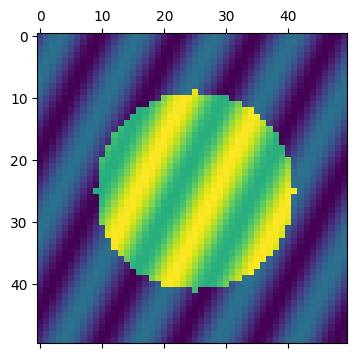

In [13]:
img = np.zeros((N,N))
img[np.sqrt((x-25)**2+(y-25)**2) <= 16] = 1
img = img + np.sin(x/2+y/4)*0.3

plt.matshow(img)

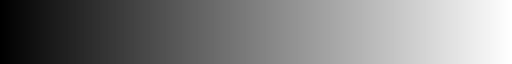

In [14]:
cmap = plt.get_cmap("grey")
cmap.set_bad((1,0,0))
cmap

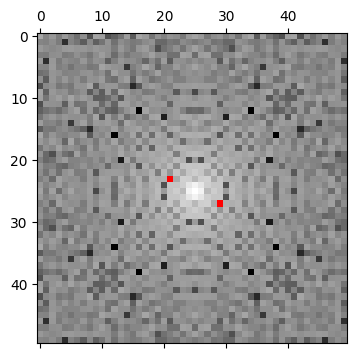

In [15]:
FFT = np.fft.fftshift(np.fft.fft2(img))
FFT[23,21] = np.nan
FFT[27,29] = np.nan
plt.matshow(abs(FFT),cmap=cmap,norm="log")
FFT = np.fft.ifftshift(FFT)

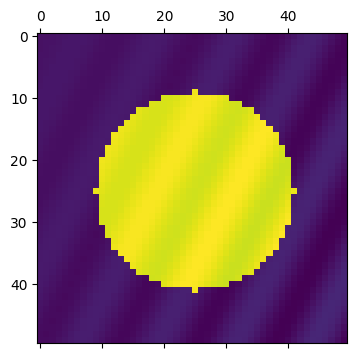

In [16]:
FFT = np.fft.fft2(img)
FFT = np.fft.fftshift(FFT)
FFT[23,21] = 0
FFT[27,29] = 0
FFT = np.fft.ifftshift(FFT)
plt.matshow( np.fft.ifft2(FFT).real )

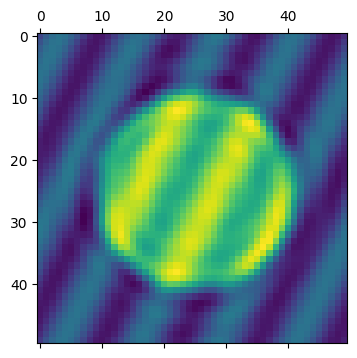

In [17]:
# quitar frecuencias altas
FFT = np.fft.fft2(img)
FFT = np.fft.fftshift(FFT)
n = 15
FFT[N-n:,:] = 0
FFT[:,N-n:] = 0
FFT[:n,:] = 0
FFT[:,:n] = 0
FFT = np.fft.ifftshift(FFT)
plt.matshow( np.fft.ifft2(FFT).real )

In [18]:
kernel = np.array([ # derivada en x (sobel)
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
#kernel = np.rot90(kernel) # cambiara derivada en y

#np.ones((5,5)) / 9


In [19]:
sz = np.array(img.shape) - np.array(kernel.shape)

In [20]:
kernel = np.pad(kernel,((sz[0]//2+1,sz[0]//2),(sz[0]//2+1,sz[0]//2)))
kernel = np.fft.ifftshift(kernel)

In [21]:
grad_x = np.fft.ifft2( np.fft.fft2(img) * np.fft.fft2(kernel) ).real

In [22]:
grad_y = np.fft.ifft2( np.fft.fft2(img) * np.fft.fft2(kernel) ).real

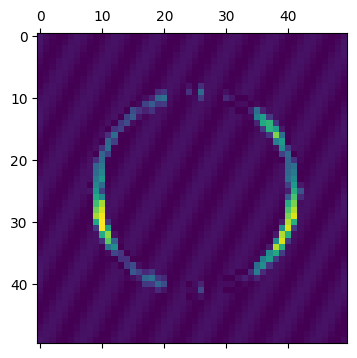

In [24]:
plt.matshow( grad_x**2 )